In [1]:
import numpy as np

In [2]:
%matplotlib inline
import seaborn as sns

In [3]:
from ptsa.data.readers import BaseEventReader
from pybeh.create_data import create_data

In [4]:
er = BaseEventReader(filename='/data/events/ltpFR/LTP093_events.mat')
events = er.read()
data = create_data(events=events, trial_field = 'trial') #list

/home1/rdehaan/.conda/envs/eeg/lib/python3.7/site-packages/ptsa/data/readers/base.py:75: FutureWarning: Lab-specific readers may be moved to the cmlreaders package (https://github.com/pennmem/cmlreaders)
  FutureWarning)


In [52]:
events[0]

('LTP093', 1, 1., 'WORD', -1., 1., 0., 0., -999., -999., 'VOLLEYBALL', 1576., 1., 0., 0., 1., -999., -999., -999., -999., 1.28501318e+12, 1, '/data/eeg/scalp/ltp/ltpFR/LTP093/session_0/eeg/eeg.noreref/LTP093_20Sep10_1603', 196749, -1, 1, [  1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  32,  33,  38,  43,  45,  46,  48,  50,  56,  57,  58,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  81,  82,  83,  84,  88,  89,  90,  91,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 107, 108, 109, 113, 114, 115, 119, 120, 121, 123, 124, 125, 126, 127, 128])

In [5]:
import pybeh.spc as spc

[Text(0.5, 0, 'Serial Position'), Text(0, 0.5, 'Probability of Recall')]

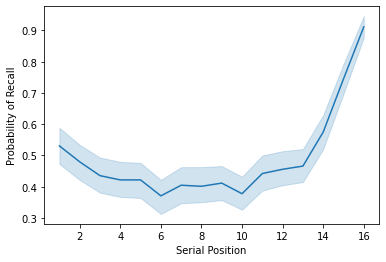

In [63]:
import pandas as pd
p_recall = spc.spc(data['recalls'],
                   np.arange(len(data['subject'])),
                   data['listLength'])
df = pd.DataFrame({"p_recall": p_recall.reshape(-1), 
                   "subject": np.repeat(data["subject"], repeats=data["listLength"]), 
                   "ser_pos": np.tile(np.arange(16)+1, len(data["subject"]))})
ax = sns.lineplot(x = "ser_pos", y = "p_recall", data=df, estimator=np.nanmean)
ax.set(xlabel='Serial Position',ylabel='Probability of Recall')

In [53]:
print(data["subject"].shape)
print(np.arange(len(data['subject'])).shape)
print(p_recall.shape)

(294, 1)
(294,)
(294, 16)


In [16]:
import pybeh.crp as crp

In [46]:
lag_crp = crp.crp(recalls=data['recalls'],
                  subjects=np.arange(len(data['subject'])),
                  listLength=16,
                  lag_num =5)

[Text(0.5, 0, 'Lag'), Text(0, 0.5, 'Conditional Response Probability')]

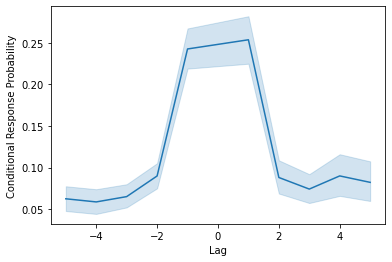

In [61]:
df = pd.DataFrame({"crp": lag_crp.reshape(-1), 
                   "subject": np.repeat(data["subject"], repeats=11), 
                   "lag": np.tile(np.arange(11) - 5, len(data["subject"]))})

ax = sns.lineplot(x = "lag", y = "crp", data=df, estimator=np.nanmean)
ax.set(xlabel='Lag',ylabel='Conditional Response Probability')

In [57]:
import pybeh.pfr as pfr

In [59]:
p_first_recall = pfr.pfr(recalls=data['recalls'],
                  subjects=np.arange(len(data['subject'])),
                  listLength=16)

[Text(0.5, 0, 'Output Position'), Text(0, 0.5, 'Probability of first recall')]

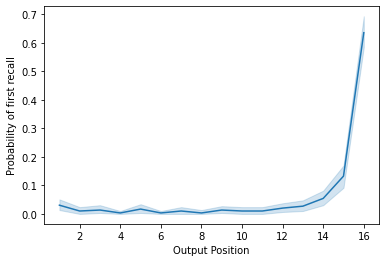

In [62]:
df = pd.DataFrame({"pfr": p_first_recall.reshape(-1), 
                   "subject": np.repeat(data["subject"], repeats=data["listLength"]), 
                   "serial_pos": np.tile(np.arange(data["listLength"]) + 1, len(data["subject"]))})

ax = sns.lineplot(x = "serial_pos", y = "pfr", data=df, estimator=np.nanmean)
ax.set(xlabel='Output Position',ylabel='Probability of first recall')